In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv('/content/winequality-red.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.shape

(1599, 12)

let's have a look at the input variable
1. fixed acidity - non volatile acid that dont evaporate easily
2. volatile acidity - are high acetic acid in wine which leads to unpleasant vinegar taste
3. citric acid - acts as a preservative, adds freshness and flavour to the wine





In [5]:
##statistical analysis to check distribution of numerical columns
df.describe

<bound method NDFrame.describe of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.0

In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<Axes: xlabel='fixed acidity', ylabel='Count'>

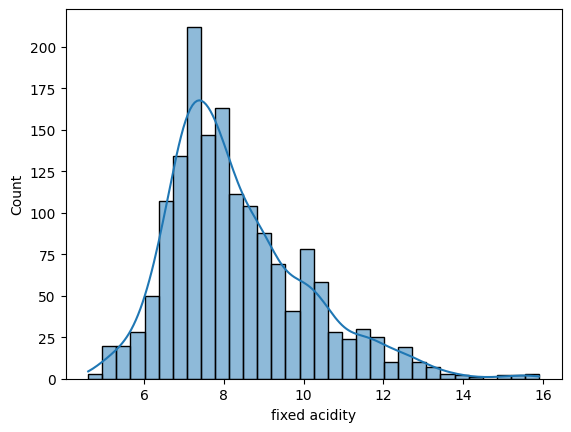

In [7]:
sns.histplot(data=df, x="fixed acidity", kde= True)

In [8]:
feature_ = df.columns [:-1]
def get_percentile(feature,q_range):
  dist = df[feature].describe()[str(q_range)+ '%']
  return round(dist,2)


In [9]:
def render_countplot():
 fig=plt.figure(figsize=(15,7))
 for column, feature in enumerate (feature_):
  fig.add_subplot(4,3,column+1)
  q1 = get_percentile(feature,25)
  q2 = get_percentile(feature,50)
  q3 = get_percentile(feature,75)
  sns.histplot(data=df, x=feature,kde=True, color='orange' )
  plt.axvline(q1,linestyle='--', color='green', label = 'q1' )
  plt.axvline(q2,linestyle='--', color='red', label = 'q2' )
  plt.axvline(q3,linestyle='--', color='black', label = 'q3' )
  plt.legend()
  plt.show()

Text(0.5, 1.0, 'count')

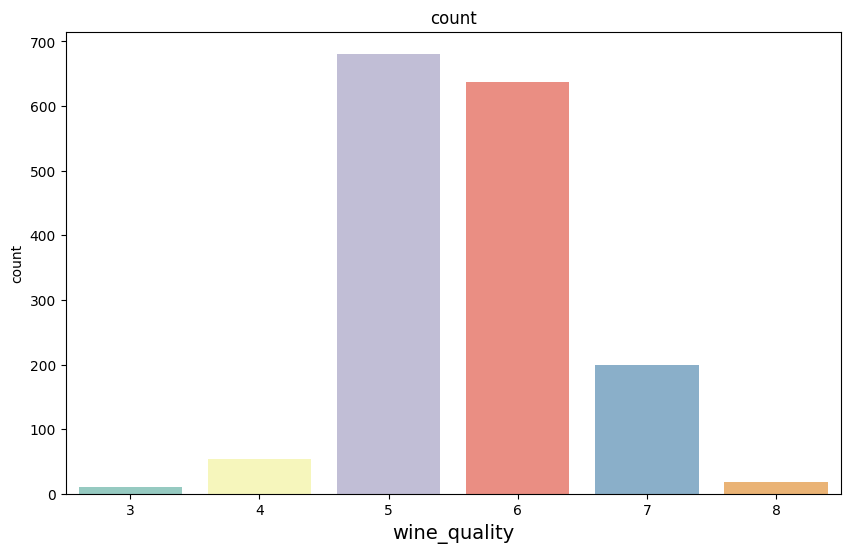

In [11]:
plt.figure(figsize=(10,6))
ax1 = sns.countplot(x='quality', data=df, palette='Set3')
plt.xlabel('wine_quality', fontsize=14)
plt.title('count')

<function matplotlib.pyplot.show(close=None, block=None)>

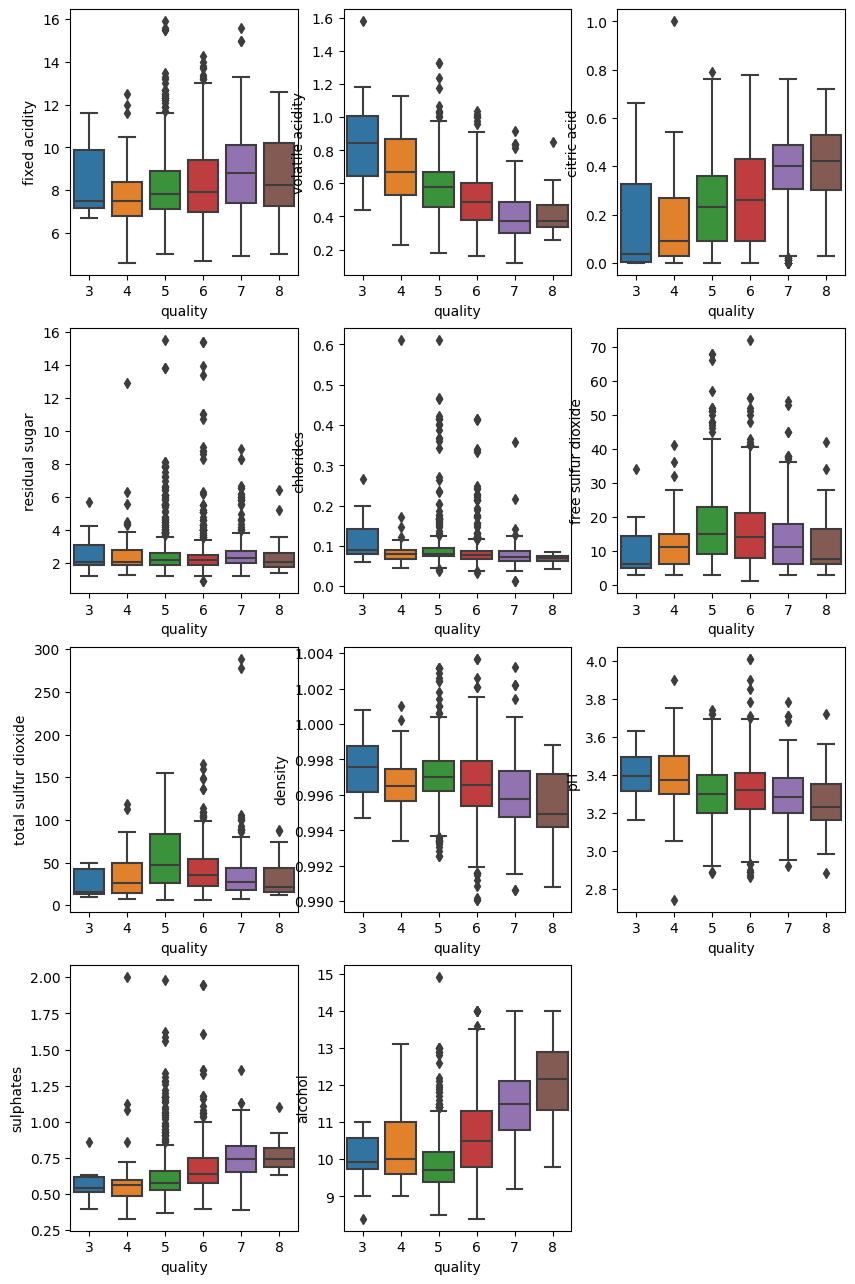

In [12]:
 feature_ = df.columns [:-1]
 fig=plt.figure(figsize=(10,20))
 for column, feature in enumerate (feature_):
  fig.add_subplot(5,3,column+1)
  sns.boxplot(data=df,x='quality', y=feature)
plt.show

In [14]:
### feature engineering
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=1,max_depth=12)
x = df.drop(['quality'],axis=1)
rf.fit(x,df.quality)

RandomForestRegressor(max_depth=12, random_state=1)

([<matplotlib.axis.YTick at 0x7ca044a38610>,
 [Text(0, 0, 'citric acid'),
  Text(0, 1, 'free sulfur dioxide'),
  Text(0, 2, 'fixed acidity'),
  Text(0, 3, 'density'),
  Text(0, 4, 'residual sugar'),
  Text(0, 5, 'pH'),
  Text(0, 6, 'chlorides'),
  Text(0, 7, 'total sulfur dioxide'),
  Text(0, 8, 'volatile acidity'),
  Text(0, 9, 'sulphates'),
  Text(0, 10, 'alcohol')])

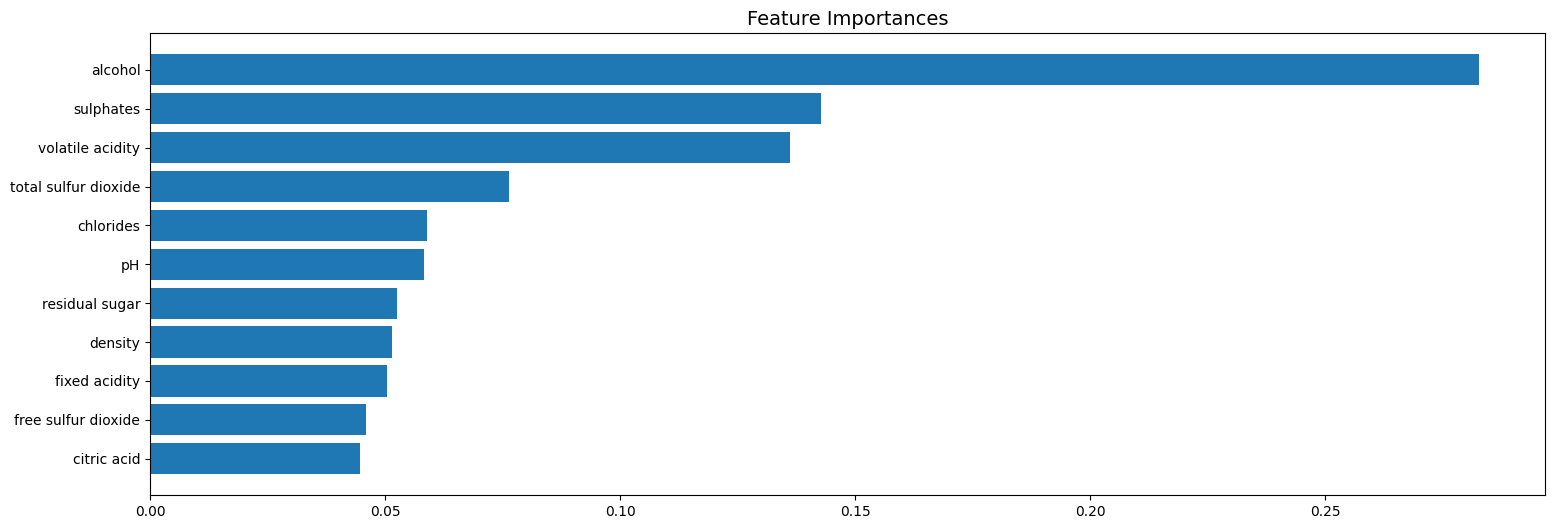

In [19]:
## store importance and feature names
features = df.columns
importances = rf.feature_importances_
sorted_index = np.argsort(importances)[:]
plt.figure(figsize=(18,6))
plt.title('Feature Importances',fontsize=14)
plt.barh(range(len(sorted_index)),importances[sorted_index])
plt.yticks(range(len(sorted_index)),[features[i] for i in sorted_index])

<Axes: >

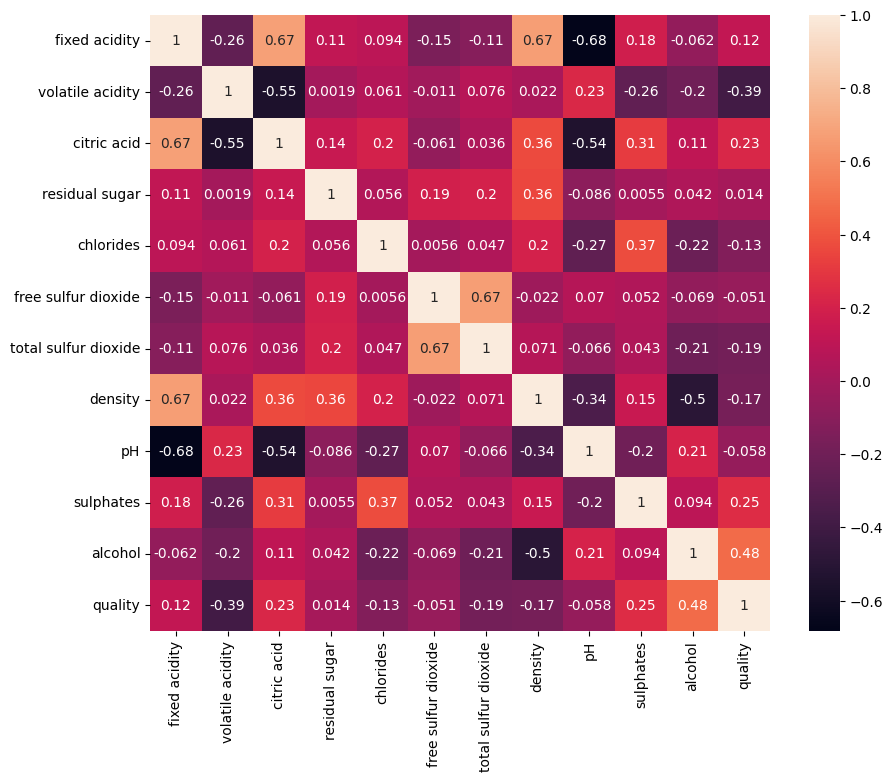

In [21]:
### multicollinearity check
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [26]:
### handling imbalanced dataset
from imblearn.over_sampling import SMOTE
x = df.drop('quality',axis=1)
y= df['quality']
smote = SMOTE(sampling_strategy='auto')
x_sm,y_sm = smote.fit_resample(x,y)

Text(0.5, 1.0, 'count')

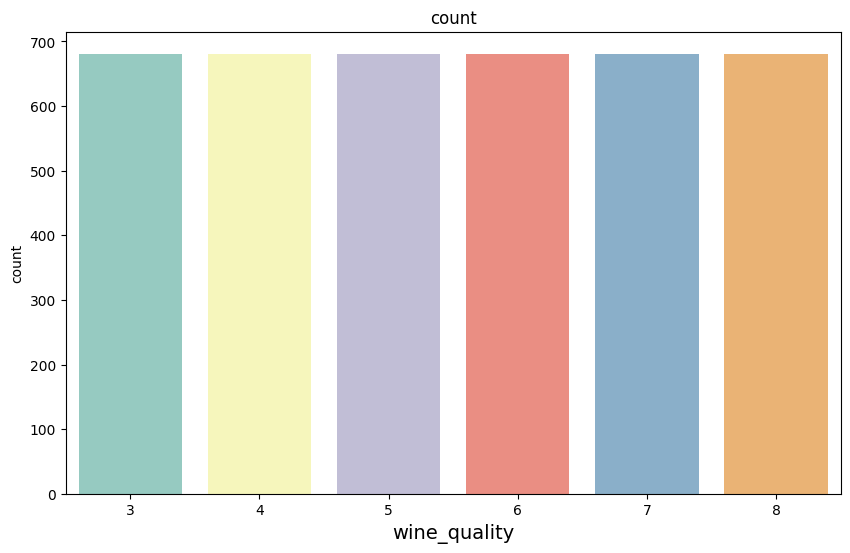

In [27]:
plt.figure(figsize=(10,6))
ax1 = sns.countplot(x=y_sm, palette='Set3')
plt.xlabel('wine_quality', fontsize=14)
plt.title('count')

In [28]:
y_sm.value_counts()

5    681
6    681
7    681
4    681
8    681
3    681
Name: quality, dtype: int64

In [29]:
x_sm

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000
...,...,...,...,...,...,...,...,...,...,...,...
4081,9.629764,0.422623,0.457377,2.561777,0.072293,6.146681,16.382227,0.995346,3.169111,0.676756,11.802677
4082,7.356135,0.364387,0.302193,1.843865,0.070052,16.561349,25.096628,0.994306,3.237807,0.713160,11.378067
4083,10.478935,0.600681,0.590308,4.547978,0.083585,6.482979,18.517021,0.997242,3.215170,0.697245,13.327553
4084,7.649527,0.561939,0.098061,2.283878,0.064731,33.193897,45.268701,0.994037,3.473972,0.740000,12.769862


In [31]:
### Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_sm[x_sm.columns] = scaler.fit_transform(x_sm[x_sm.columns])


In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_sm,y_sm,test_size=0.2,random_state=42)

In [33]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout